#### Multinomial Naive Bayes Classifier for Classificating Spam Emails

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
# Load Data
email_data = pd.read_csv('./dataset/emails.csv', header=0)

# Remove the First 1000 Columns of High Frequency Words
email_data.drop(email_data.columns[:1000], axis=1, inplace=True)

# Settings
train_data_size = 5000

# Training Set
train_X = email_data.iloc[0:train_data_size, 0:-1].values
train_Y = email_data.iloc[0:train_data_size:, -1].values

# Test Set
test_X = email_data.iloc[train_data_size:, 0:-1].values
test_Y = email_data.iloc[train_data_size:, -1].values

In [79]:
# The Parameters of The MNB Model
train_X_y0 = train_X[train_Y == 0] # Emails where y=0
train_X_y1 = train_X[train_Y == 1] # Emails where y=1

# Laplace Smoothing
X_y0_prob = (np.sum(train_X_y0, axis=0) + 1) / (np.sum(train_X_y0) + len(train_X_y0[0])) 
#! φx|y0 = (Σx(i) where y(i)=0 + 1) / (Total count of words where y=0 + num_features)
X_y1_prob = (np.sum(train_X_y1, axis=0) + 1) / (np.sum(train_X_y1) + len(train_X_y1[0])) 
#! φx|y1 = (Σx(i) where y(i)=1 + 1) / (Total count of words where y=1 + num_features)

y1_prob = np.sum(train_Y) / len(train_Y) #! φy1 = ΣI(y(i)=1) / n
y0_prob = 1- y1_prob #! φy0 = 1 - φy1

In [80]:
# Calculate the Probabilities of Test Set Using MNB.
p_y0_given_X = y0_prob * np.prod(np.power(X_y0_prob, test_X), axis=1)
#! p(y=0|x) = p(y=0) * Π[p(word|y=0)^(count of word in x)]

p_y1_given_X = y1_prob * np.prod(np.power(X_y1_prob, test_X), axis=1)
#! p(y=1|x) = p(y=1) * Π[p(word|y=1)^(count of word in x)]

# The Predicted Class Is the One where p_y1_given_X > p_y0_given_X.
test_Y_hat = np.where(p_y1_given_X > p_y0_given_X, 1, 0)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       118
           1       0.89      0.63      0.74        54

    accuracy                           0.86       172
   macro avg       0.87      0.80      0.82       172
weighted avg       0.86      0.86      0.85       172



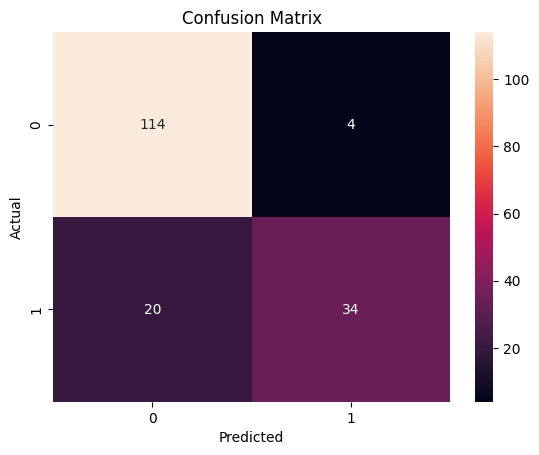

In [81]:
# Print Classification Report
print(classification_report(test_Y, test_Y_hat, zero_division=0))

# Create Confusion Matrix
cm = confusion_matrix(test_Y, test_Y_hat)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()